# Assignment 4

## Introduction to notebook

Professor Chris Brooks ("Client" or "client") has increased his exercise over the summer of 2019 and started collecting data on what he was doing. Throughout the summer he bought a variety of devices (heart rate monitor, watch, bicycle, etc.), and began publishing this data to the social sharing site strava. <br>

This published paper should answer the following: 

1. compelling computational narrative, judged in part by Rule et al’s ten rules for computational analyses?

2. demonstration of a solid grasp of at least three of the basic visual analysis techniques in SIADS 521 (scatter, box, line, violin, histograms, heatmaps, probability plots, treemaps, sploms) and that they were appropriate for the analysis/data you were investigating

3. Demonstrate at least one of the more advanced visual analysis techniques in the class

4. Provide an interesting and defensible analysis. Visualization of data should help Professor Brooks understand what data means. 

**Rule 3: Use cell divisions to make steps clear** <br> I have adhered to Rule 3 making each cell of the notebook a meaningful one that is easy to understand (1) from the code or (2) labelling the cells with mark down / commentary above the code cell.  Each code cell has a purpose to accomplish the task of creating one visualization. They are kept short to avoid messiness in reading. 

## Understanding and cleaning the data 
**Rule 2: Document the process, not just the results** <br>
It is important to document all the explorations, even those which leads to deadends. <br>
At the start, it is always important to appreciate and understand the data before performing the analysis. I have documented down the data wrangling process. In a step-by-step manner, readers would be able to grasp the variations in different implementations 


In [2]:
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import matplotlib.dates as mdates

import time
from datetime import datetime, timedelta
import pickle
import folium


import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [3]:
uncleanfit_df = pd.read_csv('strava.csv')

In [49]:
uncleanfit_df['timestamp'] = pd.to_datetime(uncleanfit_df['timestamp'])

uncleanfit_df['start_time'] = pd.to_datetime(uncleanfit_df['timestamp']).dt.time

uncleanfit_df['date'] = pd.to_datetime(uncleanfit_df['timestamp']).dt.date

uncleanfit_df['day_of_week'] = pd.to_datetime(uncleanfit_df['timestamp']).dt.day_name()

uncleanfit_df['distance_km'] = uncleanfit_df['distance']/1e3

uncleanfit_df.head(5)

,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,cadence,datafile,...,position_long,speed,timestamp,unknown_87,unknown_88,unknown_90,start_time,date,distance_km,day_of_week
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,...,NaN,0.0,2019-07-08 21:04:03,0.0,300.0,NaN,21:04:03,2019-07-08,0.00000,Monday
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,...,NaN,0.0,2019-07-08 21:04:04,0.0,300.0,NaN,21:04:04,2019-07-08,0.00000,Monday
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,activities/2675855419.fit.gz,...,NaN,1316.0,2019-07-08 21:04:07,0.0,300.0,NaN,21:04:07,2019-07-08,0.00132,Monday
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3747.0,77.0,activities/2675855419.fit.gz,...,-999063637.0,1866.0,2019-07-08 21:04:14,0.0,100.0,NaN,21:04:14,2019-07-08,0.01219,Monday
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3798.0,77.0,activities/2675855419.fit.gz,...,-999064534.0,1894.0,2019-07-08 21:04:15,0.0,100.0,NaN,21:04:15,2019-07-08,0.01408,Monday


In [50]:
uncleanfit_df.describe()

,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,cadence,distance,...,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,speed,unknown_87,unknown_88,unknown_90,distance_km
count,17842.000000,17847.000000,17842.000000,17847.000000,17842.000000,17847.000000,17847.000000,14905.000000,40627.000000,40649.000000,...,40639.000000,40627.000000,38355.000000,4.045700e+04,4.045700e+04,14928.000000,40627.0,38355.000000,18618.000000,40649.000000
mean,1.872100,77.726565,99.485932,325.934107,13.138571,301.459797,6.458074,3846.184368,72.781254,4097.140051,...,3.037084,0.070138,134.680094,5.045408e+08,-9.995175e+08,2067.483856,0.0,298.513883,-1.067354,4.097140
std,2.777476,9.202077,13.866222,71.773687,2.039567,48.540552,1.135497,134.262498,17.743728,5827.964663,...,1.959805,0.173639,18.713782,1.690905e+05,1.376341e+06,527.173476,0.0,17.176218,2.820492,5.827965
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3555.000000,0.000000,0.000000,...,0.000000,0.000000,56.000000,5.039868e+08,-1.005696e+09,0.000000,0.0,100.000000,-13.000000,0.000000
25%,1.000000,78.000000,97.000000,308.000000,13.000000,283.000000,6.125000,3768.000000,74.000000,1117.970000,...,2.109000,0.000000,121.000000,5.044397e+08,-9.993986e+08,1782.000000,0.0,300.000000,-3.000000,1.117970
50%,1.000000,79.000000,101.000000,326.000000,13.375000,303.000000,6.500000,3829.000000,78.000000,2430.500000,...,2.445000,0.000000,136.000000,5.045116e+08,-9.992608e+08,2071.000000,0.0,300.000000,0.000000,2.430500
75%,2.000000,80.000000,105.000000,340.000000,13.750000,326.000000,7.000000,3912.000000,80.000000,4403.730000,...,2.809000,0.000000,148.000000,5.046159e+08,-9.990579e+08,2370.000000,0.0,300.000000,0.000000,4.403730
max,48.000000,88.000000,125.000000,1732.000000,16.875000,462.000000,12.500000,5043.000000,118.000000,39007.120000,...,15.349000,0.500000,183.000000,5.089272e+08,-9.921938e+08,7744.000000,0.0,300.000000,6.000000,39.007120


I use Matplotlib to provide me a high level overview on the various columns we have in the strava data provided to us. 






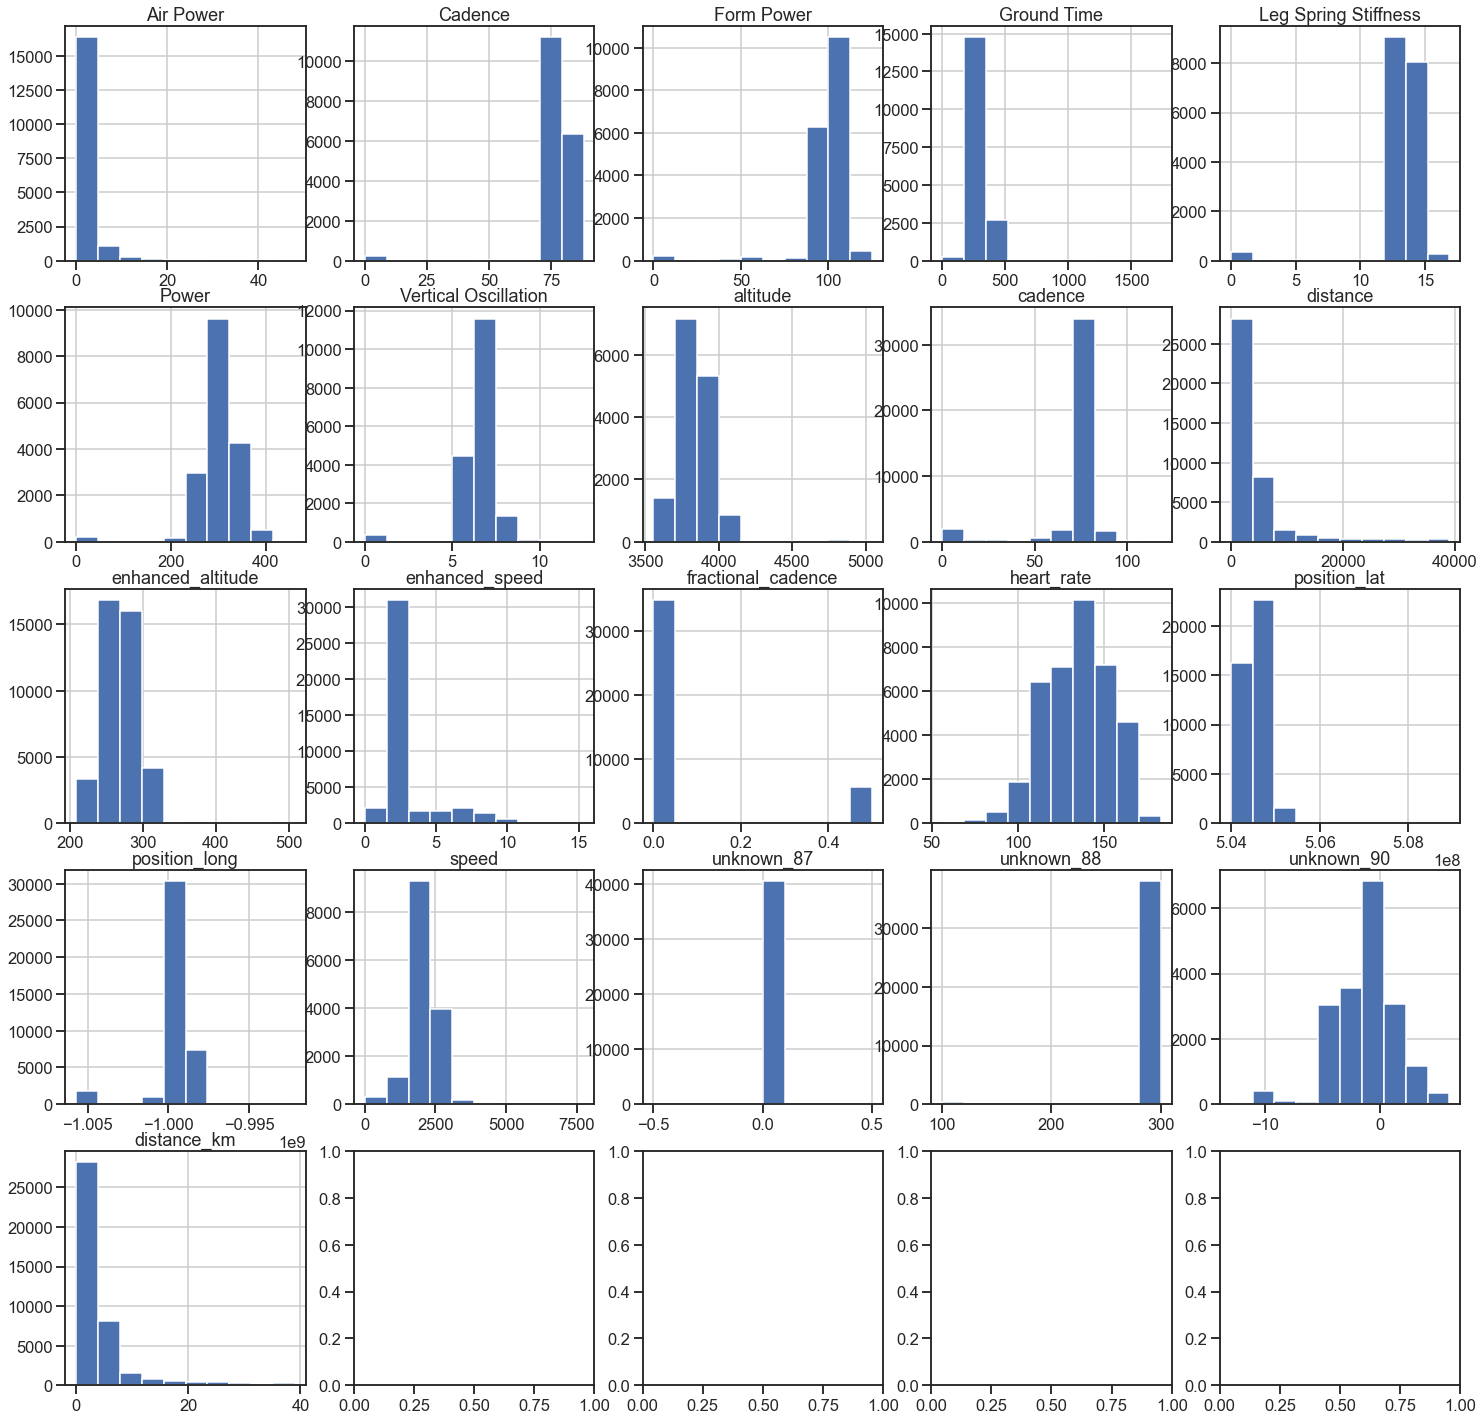

In [51]:
fig, m_axs = plt.subplots(5, 5, figsize=(25, 25))
for c_ax, c_col in zip(m_axs.flatten(), uncleanfit_df.select_dtypes(['float', 'int']).columns):
    uncleanfit_df[c_col].hist(ax=c_ax)
    c_ax.set_title(c_col)

Another way to understand the data is to analyse the correlation between the different fields namely - 

1) Speed
2) Heart rate
3) Vertical Oscillation
4) Power

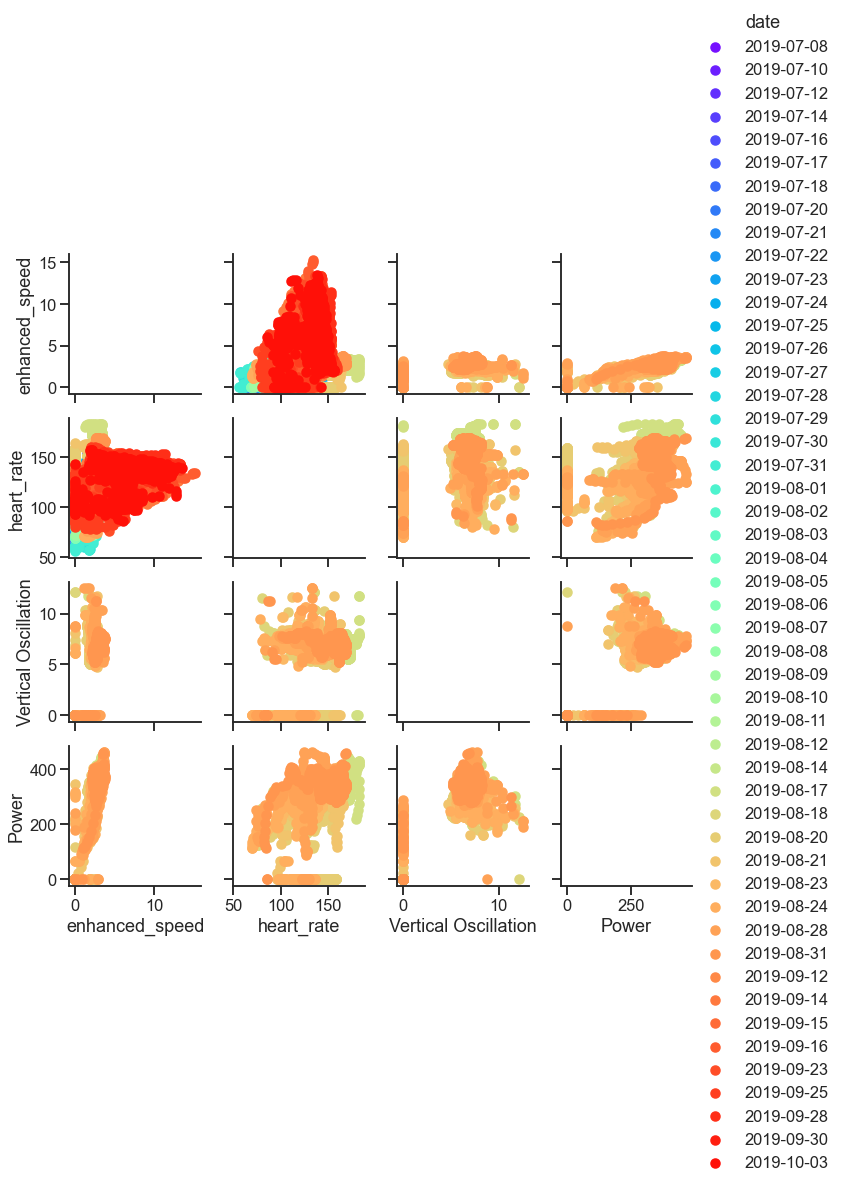

In [143]:
bydate_df = uncleanfit_df[['date','enhanced_speed','heart_rate','Vertical Oscillation','Power']]
g = sns.PairGrid(bydate_df, palette='rainbow', hue='date')
g.map_offdiag(plt.scatter)
g.add_legend();

From the above, I am interested to find out the following relations:

1) Heart rate vs speed
2) Heart rate vs Power
3) Heart rate vs vertical oscillation
4) Power vs Vertical Oscillation

To keep things simple, will drop unwanted columns. 
Will keep enhanced speed since enhanced speed captures all values, while speed stops recording values after a date. So, I guess, enhanced_speed should be used throughout.


In [315]:
## Columns to drop. 
uncleanfit_df.drop(['speed'], axis=1)

## df.to_csv('file_name.csv')
#uncleanfit_df = uncleanfit_df.rename(columns={"distance": "distance(m)", "enhanced_speed": "speed(ms)"})
##uncleanfit_df.drop(['unknown_90', 'unknown_87'], axis=1)

,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,cadence,datafile,...,position_lat,position_long,timestamp,unknown_87,unknown_88,unknown_90,start_time,date,distance_km,day_of_week
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,...,NaN,NaN,2019-07-08 21:04:03,0.0,300.0,NaN,21:04:03,2019-07-08,0.00000,Monday
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,...,NaN,NaN,2019-07-08 21:04:04,0.0,300.0,NaN,21:04:04,2019-07-08,0.00000,Monday
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,activities/2675855419.fit.gz,...,NaN,NaN,2019-07-08 21:04:07,0.0,300.0,NaN,21:04:07,2019-07-08,0.00132,Monday
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3747.0,77.0,activities/2675855419.fit.gz,...,504432050.0,-999063637.0,2019-07-08 21:04:14,0.0,100.0,NaN,21:04:14,2019-07-08,0.01219,Monday
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3798.0,77.0,activities/2675855419.fit.gz,...,504432492.0,-999064534.0,2019-07-08 21:04:15,0.0,100.0,NaN,21:04:15,2019-07-08,0.01408,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,activities/2925939753.fit.gz,...,504554553.0,-999308618.0,2019-10-03 23:04:54,0.0,300.0,NaN,23:04:54,2019-10-03,38.62730,Thursday
40645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,activities/2925939753.fit.gz,...,504553919.0,-999309466.0,2019-10-03 23:04:56,0.0,300.0,NaN,23:04:56,2019-10-03,38.63565,Thursday
40646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,activities/2925939753.fit.gz,...,504553588.0,-999309432.0,2019-10-03 23:04:57,0.0,300.0,NaN,23:04:57,2019-10-03,38.63863,Thursday
40647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,activities/2925939753.fit.gz,...,504552459.0,-999308808.0,2019-10-03 23:05:02,0.0,300.0,NaN,23:05:02,2019-10-03,38.64999,Thursday


Now that we done some basic analysis on the dataset, we know that each line is missing an activity type. <br>
It is important to allocate the data to three buckets (activity type), namely (1) Walking, (3) Running, (4) Cycling. <br>

This is somewhat subjective, for our purpose I have used speed to determine the activity type as follows: <br>
(1) Walking defined as speed between 1 m/s to 4 m/s <br>
(2) Running defined as speed between 5 m/s to 8m/s <br>
(3) Cycling defined as speed above 9m/s 




In [316]:
distance_date = uncleanfit_df.groupby('date').max()
distance_date_type2 = uncleanfit_df.groupby('date').mean()

distance_date['top_speed'] = distance_date["enhanced_speed"]
distance_date['time_taken(min)'] = distance_date["distance"] / distance_date["enhanced_speed"]/60
distance_date['ave_speed'] = distance_date_type2["enhanced_speed"]
distance_date.rename(columns={'heart_rate': 'max_HR'}, inplace=True)
distance_date['HR'] = distance_date_type2['heart_rate']


distance_date = distance_date.reset_index()




distance_date.head()

distance_date_type2.to_csv('distance_date_type2.csv')
distance_date.to_csv('distance_date_.csv')


In [321]:
distance_date["workout_type"] = distance_date["top_speed"]

# Create a new column with an activity defined by a larger or smaller value
distance_date["workout_type"] = np.where(distance_date['workout_type'] <=7.5, 1,distance_date['workout_type'] )

distance_date["workout_type"] = np.where(distance_date['workout_type'] >7.5, 2,distance_date['workout_type'] )

ex_df= distance_date.replace({'workout_type':{1:"Run", 2:"Cycle"}})

ex_df.to_csv('ex_df.csv')


Let's look at some specifics of data

In [322]:
ex_df.nlargest(5,'top_speed')

,date,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,cadence,...,unknown_88,unknown_90,start_time,distance_km,day_of_week,top_speed,time_taken(min),ave_speed,HR,workout_type
42,2019-09-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0,...,NaN,NaN,22:24:19,7.34634,Sunday,15.349,7.977002,5.543096,NaN,Cycle
43,2019-09-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,...,300.0,NaN,21:59:45,28.57743,Monday,15.237,31.258811,6.365662,125.924547,Cycle
47,2019-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118.0,...,NaN,NaN,23:04:02,39.00712,Monday,13.921,46.700572,6.547386,NaN,Cycle
48,2019-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.0,...,300.0,NaN,23:05:05,38.65259,Thursday,13.511,47.680396,6.592298,135.955556,Cycle
45,2019-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0,...,300.0,NaN,22:29:29,15.60688,Wednesday,13.362,19.466746,5.510255,132.779221,Cycle


In [323]:
ex_df.nsmallest(5,'top_speed')

,date,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,cadence,...,unknown_88,unknown_90,start_time,distance_km,day_of_week,top_speed,time_taken(min),ave_speed,HR,workout_type
16,2019-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4044.0,79.0,...,300.0,NaN,12:23:19,3.67115,Monday,1.997,30.638875,1.676036,99.187675,Run
12,2019-07-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3887.0,90.0,...,300.0,NaN,00:13:11,1.91486,Thursday,2.025,15.760165,1.867573,110.631373,Run
26,2019-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3941.0,83.0,...,300.0,-2.0,00:35:42,3.48500,Thursday,2.099,27.671907,1.719548,135.746736,Run
18,2019-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3929.0,82.0,...,300.0,NaN,23:22:24,2.70555,Wednesday,2.613,17.256984,2.023512,108.972424,Run
13,2019-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4019.0,80.0,...,300.0,0.0,21:35:38,10.08415,Friday,2.650,63.422327,1.954672,117.933005,Run


It will be interesting to find out the number of times Chris ran from 08 Jul - 03 Oct 19 as compared to cycling.  

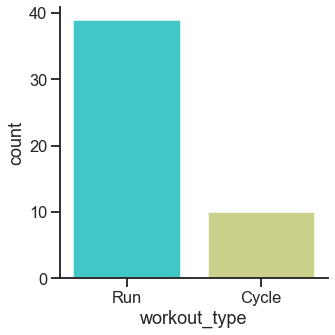

In [324]:
sns.catplot(x='workout_type', kind='count', data=ex_df, palette = 'rainbow');

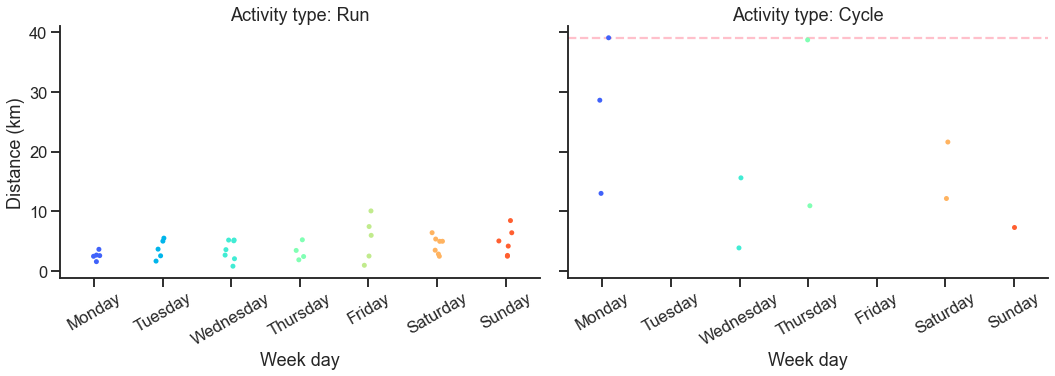

In [325]:
day_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday' ]

g = sns.catplot(x='day_of_week', y='distance_km', kind='strip', data=ex_df, 
                order=day_of_week_order, col='workout_type', height=5, aspect=1.5,
                palette='rainbow')

(g.set_axis_labels("Week day", "Distance (km)")
  .set_titles("Activity type: {col_name}")
  .set_xticklabels(rotation=30))

plt.axhline(ex_df['distance_km'].max(), linestyle='--', color = 'pink', zorder=0)

Chris leads a healthy lifestyle. he either cycle or runs everyday of the week. 

*Cycling* -
At first glance, it seems he cycled the longest distance on Monday and Wednesday. I have purposefully drawn a line to see if he cycled longer on Monday or Wednesday. The pink dotted line drawn help us decode thathHe clocked the longest cycling distance on Monday followed Wednesday. Another observation is that he seemed to clock longer cycling distances on Monday instead of other days of the week. <br>

*Running* -
He clocked most number of runs on Wednesday and Saturday at 7 times, followed by Saturday and Friday which ties at 6 times during the period - Jul to Sep 19.  

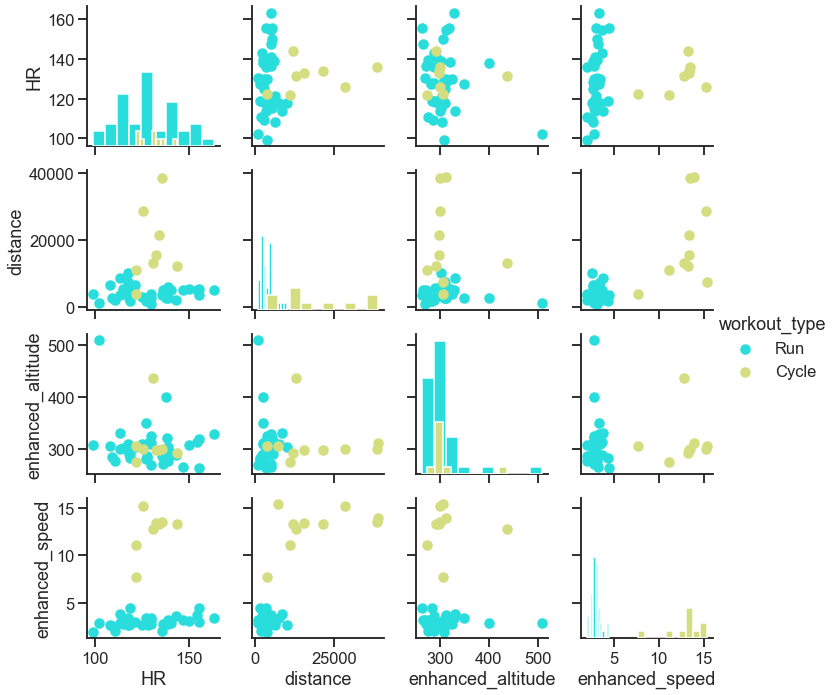

In [328]:
temp_df = ex_df[['workout_type','HR','distance','enhanced_altitude','enhanced_speed']]

g = sns.PairGrid(temp_df, hue='workout_type', palette='rainbow')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

Total distance covered by Chris from 8th Jul to 3th Oct.

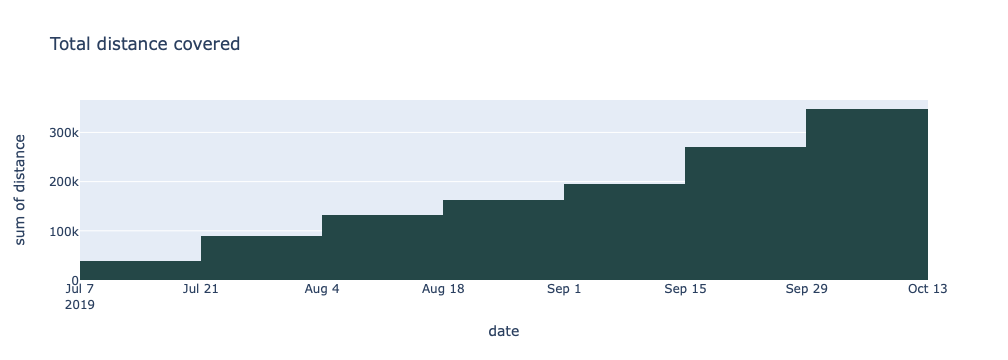

In [329]:
##fig = go.Figure(data=[go.Histogram(y=df['distance'], x = df['date'], cumulative_enabled=True)]) 
##fig.show()

px.histogram(distance_date,
            y = 'distance',
            x = 'date', 
            title = 'Total distance covered', 
            color_discrete_sequence=["#244747"],  
            cumulative = True) 


Now that we are done doing a high level review on the data we have and provided some simple charts to show the correlation and interesting data points, we can move on to our deep dive. 

## 2. Analysis on Distance, Time, Speed

At this point, I just start asking questions about Chris' data. The first that popped into my head was: is there a relationship between how far he run / cycle and his average speed? Did he run/cycle slower when the distance was longer?

I will use Seaborn to create plots. In the examples below, the syntax is pretty self explanatory. But you can find far more information on their website. The following code will create a regression plot of my average speed vs distance. Note that, for now, the speed is in meters per second. 

In [330]:
run_df = ex_df[ex_df.workout_type == 'Run']
run_df.reset_index()

cycle_df = ex_df[ex_df.workout_type == 'Cycle']
cycle_df.reset_index()

,index,date,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,...,unknown_88,unknown_90,start_time,distance_km,day_of_week,top_speed,time_taken(min),ave_speed,HR,workout_type
0,11,2019-07-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4036.0,...,300.0,NaN,23:59:58,3.90454,Wednesday,7.744,8.403366,2.158751,122.079861,Cycle
1,40,2019-09-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,300.0,NaN,00:45:32,10.94440,Thursday,11.122,16.400527,5.010060,121.892216,Cycle
2,41,2019-09-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,300.0,NaN,21:37:39,21.59262,Saturday,13.315,27.027938,6.471152,134.121622,Cycle
3,42,2019-09-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,22:24:19,7.34634,Sunday,15.349,7.977002,5.543096,NaN,Cycle
4,43,2019-09-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,300.0,NaN,21:59:45,28.57743,Monday,15.237,31.258811,6.365662,125.924547,Cycle
5,44,2019-09-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,300.0,NaN,21:31:09,13.01443,Monday,12.811,16.931322,5.903938,131.168717,Cycle
6,45,2019-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,300.0,NaN,22:29:29,15.60688,Wednesday,13.362,19.466746,5.510255,132.779221,Cycle
7,46,2019-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,300.0,NaN,22:20:01,12.15782,Saturday,13.268,15.272108,7.069993,143.824257,Cycle
8,47,2019-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,23:04:02,39.00712,Monday,13.921,46.700572,6.547386,NaN,Cycle
9,48,2019-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,300.0,NaN,23:05:05,38.65259,Thursday,13.511,47.680396,6.592298,135.955556,Cycle


## 2a. Run Workouts ##

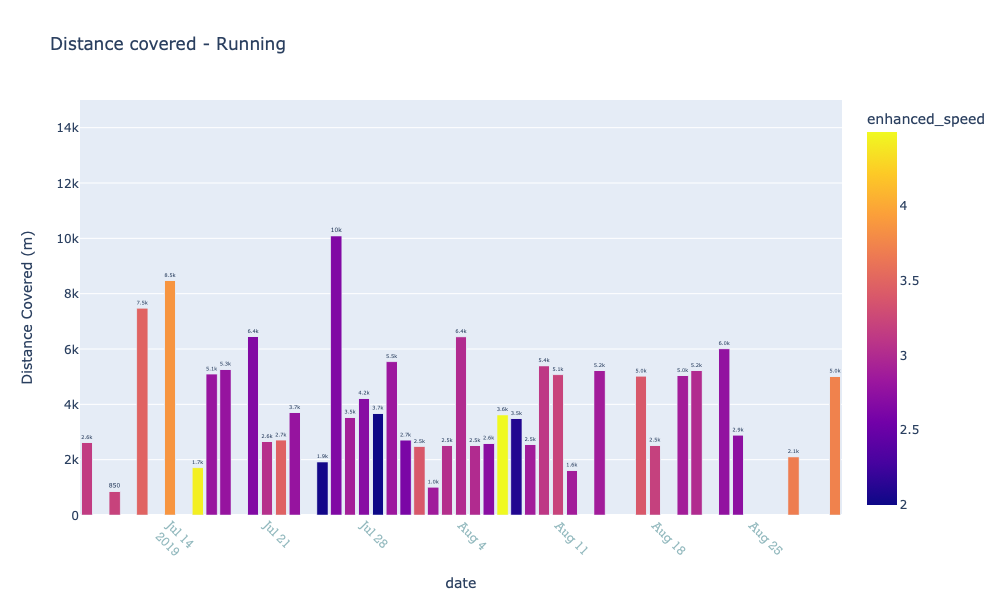

In [ ]:
fig = px.bar(run_df,
            y = 'distance',
            x = 'date',  
            labels = {
                "distance": "Distance Covered (m)"
            },  
            text_auto='.2s',  
            title = 'Distance covered - Running', 
            color = 'enhanced_speed',
            height = 600, 
            width = 1000,
            ## color_discrete_Sequence changes the line color
            color_discrete_sequence=["#244747"]              
            )

fig.update_yaxes(range=[0.0, 15000.0])

## To change font type, size, color of axis 
fig.update_xaxes(tickangle=45, tickfont=dict(
                               family='Rockwell', 
                               color='#91b8bd', 
                               size=12)) 

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

fig.show()

### change bar color


From the above chart, we can decode that he ran the longest distance on 26 Jul 19, total of 10km covered with speed of 2.65m/s. 

The date might not tell our client much, lets look at which day of the week he runs most in a week. 


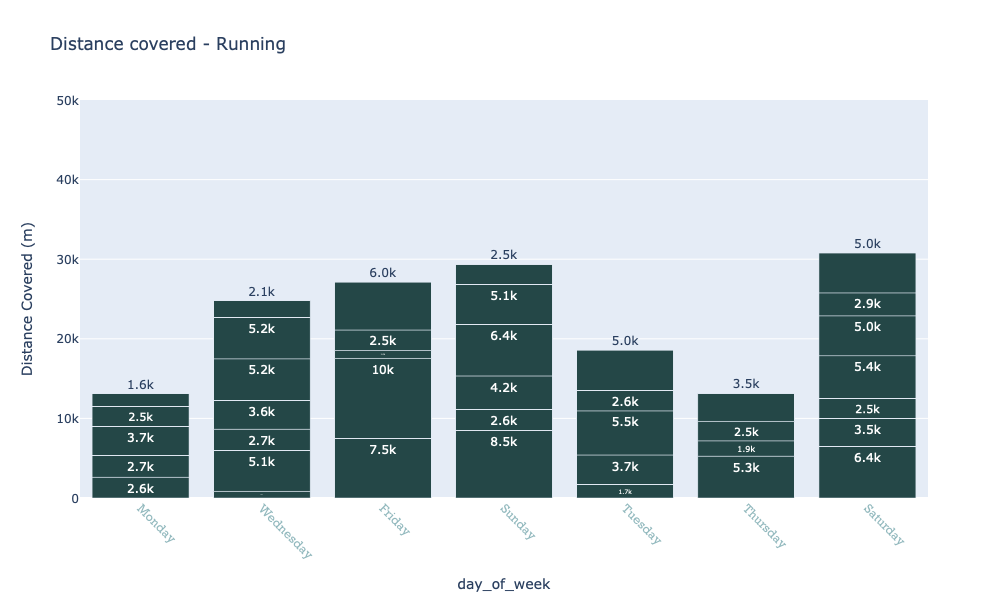

In [411]:
fig = px.bar(run_df,
            y = 'distance',
            x = 'day_of_week',  
            labels = {
                "distance": "Distance Covered (m)"
            },  
            text_auto='.2s',  
            title = 'Distance covered - Running', 
            ## color = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
            height = 600, 
            width = 1000,
            ## color_discrete_Sequence changes the line color
            color_discrete_sequence=["#244747"]              
            )

fig.update_yaxes(range=[0.0, 50000.0])

## To change font type, size, color of axis 
fig.update_xaxes(tickangle=45, tickfont=dict(
                               family='Rockwell', 
                               color='#91b8bd', 
                               size=12)) 

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

fig.show()

We can decode from the above chart that our client clocked the most distance on Saturday followed by Sunday. 

Text(0.5, 1.0, 'Average Speed vs Distance - Run')

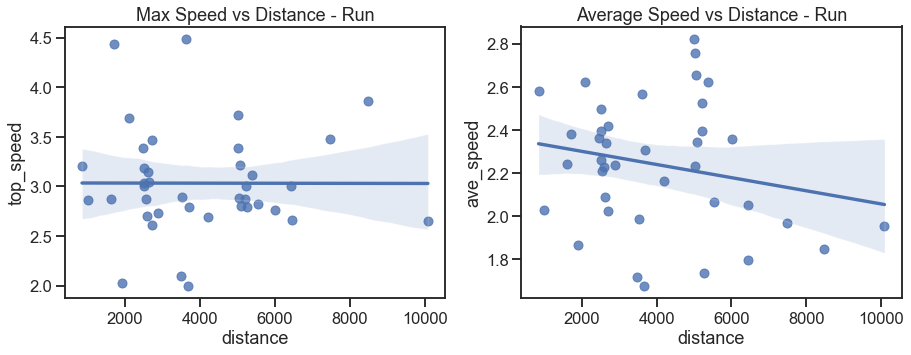

In [418]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.set(style="ticks", context="talk")
sns.regplot(ax=axes[0], x='distance', y = 'top_speed', data = run_df).set_title("Max Speed vs Distance - Run")

sns.set(style="ticks", context="talk")
sns.regplot(ax=axes[1], x='distance', y = 'ave_speed', data = run_df).set_title("Average Speed vs Distance - Run")

I can decode from the above chart to client that his maximum speed during the duration for all run average out to be around 3m/s. <br>   

From this chart I can decode that our client's average speed decreases as the distance increases. This kind of make sense from an athlete point of view whereby speed decreases as distance of the run increases. 

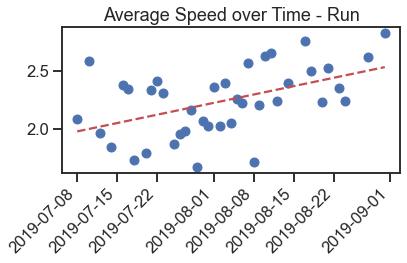

In [419]:
fig = plt.figure() #create overall container
ax2 = fig.add_subplot(111) #add a 1 by 1 plot to the figure
x2 = np.asarray(run_df.date)  #convert data to numpy array
y2 = np.asarray(run_df.ave_speed)
ax2.plot_date(x2, y2) #plot data points in scatter plot on ax1
ax2.set_title('Average Speed over Time - Run')
#ax1.set_ylim([0,5])
#add trend line
x4 = mdates.date2num(x2)
z=np.polyfit(x4,y2,1)
p=np.poly1d(z)
plt.plot(x2,p(x4),'r--')

fig.autofmt_xdate(rotation=45)
fig.tight_layout()


From the above chart, I can decode from the positve gradient trendline that Chris' speed has improved with each day of training. 

It looks like our client's runs have indeed got faster, on average, over time! This can be decoded from the positive gradient trendline which shows that Chris' speed has improved with each day of training. 

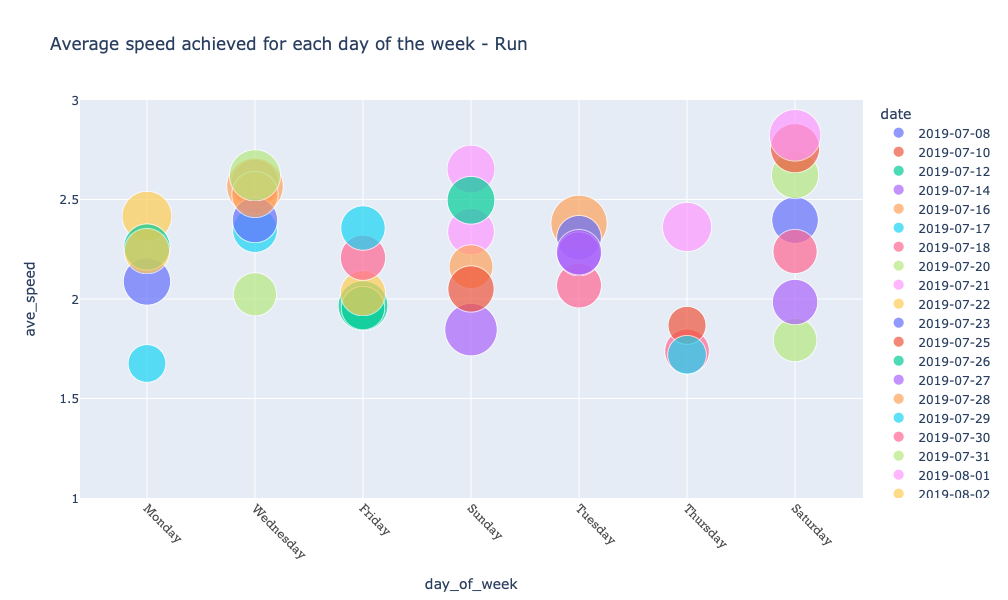

In [429]:
def px_bar_chart_top_run():

    fig = px.scatter(run_df,
            y = 'ave_speed',
            x = 'day_of_week', 
            labels = {
                "enhanced_speed": "max speed"
            },
             
            ##text_auto='.2s', 
            ##y = 'VintageRating',
            ##hover_name = 'Winery', 
            title = 'Average speed achieved for each day of the week - Run', 
            color = 'date', 
            size = 'top_speed', size_max = 40,         
            height = 600, 
            width = 1000,
            ## color_discrete_Sequence changes the line color  
            ##color_discrete_sequence=["#acc8d4"]            
            )

    ## To change range of the y axis, I wanted to magnify the effect, so I started off the y-axis with 4.0 as compared to 0.0
    fig.update_yaxes(range=[1, 3.0])

    fig.update_xaxes(tickangle=45, tickfont=dict(
                               family='Rockwell', 
                               color='#4a4a4a', 
                               size=12))

    ## To include text in the bars itself
    ## fig.update_traces(textfont_size=12, textangle=0, textposition="inside", cliponaxis=False)

    fig.show()
    
    return

px_bar_chart_top_run()

We can easily decode from the above that his top average speed was the highest on Saturday (encoded by y-axis) with top speed (encoded by size of circle) achieved on Wednesday. 

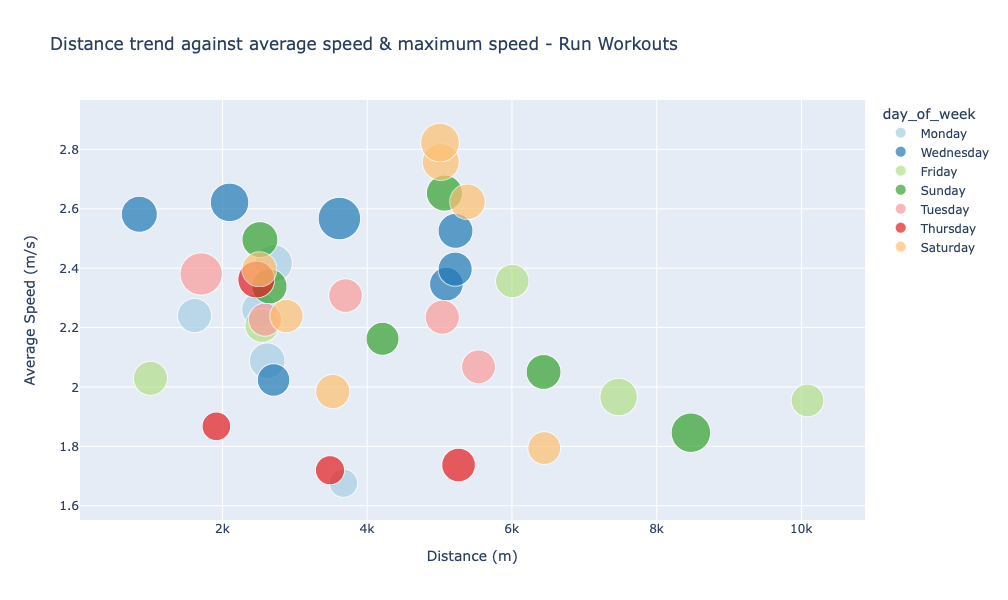

In [387]:
def scatter_plot_run():

    fig = px.scatter(run_df, x='distance', 
                    y = 'ave_speed',
                    labels = {
                        "ave_speed": "Average Speed (m/s)",
                        "distance": "Distance (m)"
                
                    }, 
                   color = 'day_of_week',
                   size = 'top_speed', size_max = 30,
                   title = 'Distance trend against average speed & maximum speed - Run Workouts', 
                   color_discrete_sequence = px.colors.colorbrewer.Paired, 
                   hover_name = 'day_of_week'
                   
                    )
    
    fig.update_layout(hoverlabel_bgcolor='#efe8d1',               #Change the background color of the tooltip to light blue
             autosize=False,
             width=1000,
             height=600)
    
    
    fig.show()
    
    return

scatter_plot_run()

I will like that my analysis will help my client understand day of the week which they achieve their best performance. <br>

From the above chart, I can decode via the (1) hover names and (2) unique color for each day that most of his top speeds for his run workouts are achieved over the weekends  - Saturday and Sunday. <br>

Another observation from the size of circle which decodes the top speed is that most of his top speeds are achieved on Wednesday. 

However it is also important to make sure client is exercising right. To do this, lets look at his heart rate during his run workout. 

But first, let us all agree on the ideal heart rate bpm he should be working within: 

<font color=green>Determing the ideal heart rate range:</font><br>

Client disclosed he is 44 years of age. 

When a person exercises, his heart should beat at a certain rate. This is called target heart rate. Here’s how to figure it out based on medical journal [hopkinsmedicine](https://www.hopkinsmedicine.org/diabetes/diabetes_education/patient_education_material/exercising_like_your_life_depends_on_it.pdf) <br>

Steps to calculate maximum and minimum heart rate for Client as follows: 

• Estimate your maximum heart rate. To do this, subtract your age from 220. A 44-year-old person would have an estimated maximum heart rate of 176 beats per minute (BPM).

• Multiply your maximum heart rate by 0.65. This is the low end of your target heart rate (176 x 0.65 = 114 BPM).

• Multiply your maximum heart rate by 0.80. This is the high end of your target heart rate (176 x 0.80 = 141 BPM).

• So, Client 44-year-old of age would have a target heart rate of 114 to 141 BPM.

![heartrate](heartrate.png)


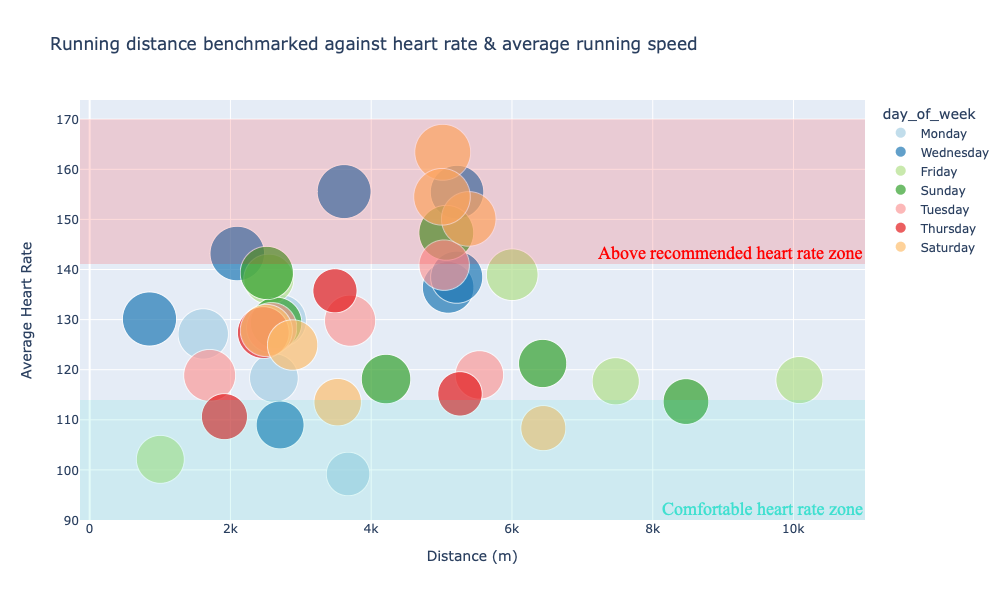

In [505]:
def scatter_plot_():

    fig = px.scatter(run_df, x='distance', 
                    y = 'HR',
                    labels = {
                        "HR": "Average Heart Rate",
                        "distance": "Distance (m)"
                
                    }, 
                   color = 'day_of_week',
                   size = 'ave_speed', size_max = 40,
                   title = 'Running distance benchmarked against heart rate & average running speed',
                          
                   color_discrete_sequence = px.colors.colorbrewer.Paired, 
                   hover_name = 'day_of_week'
                   
                    )
    
    fig.add_hrect(y0=141, y1=170, line_width=0, fillcolor="red", opacity=0.14, 
                  annotation_text="Above recommended heart rate zone", 
                  annotation=dict(font_size=18, font_family="Times New Roman"),
                  annotation_font_color="red",
                  annotation_position="bottom right",                
                 )
    
    fig.add_hrect(y0=90, y1=114, line_width=0, fillcolor="turquoise", opacity=0.14, 
                  annotation_text="Comfortable heart rate zone", 
                  annotation=dict(font_size=18, font_family="Times New Roman"),
                  annotation_font_color="turquoise",
                  annotation_position="bottom right",                
                 )
    
    fig.update_layout(hoverlabel_bgcolor='#efe8d1',               #Change the background color of the tooltip to light blue
             autosize=False,
             width=1000,
             height=600)
    
    
    fig.show()
    
    return

scatter_plot_()

Based on the above charts and analysis performed, I can conclude the following 
(1) Saturday was the day he clocked the most distance. 
(2) Saturday was also the day that he achieved his highest average speed. 
(3) He is not a weekend warrior as our client is quite consistent in his training with run trainings well spread out throughout the week. 
(4) He pushes himself very hard during training on Saturdays. he may be running with a group of friends or students resulting in him pushing himself above the recommended maximum heart rate of 141 bpm.   


It will be interesting to see the number of times his heart rate is above the acceptable range of 141


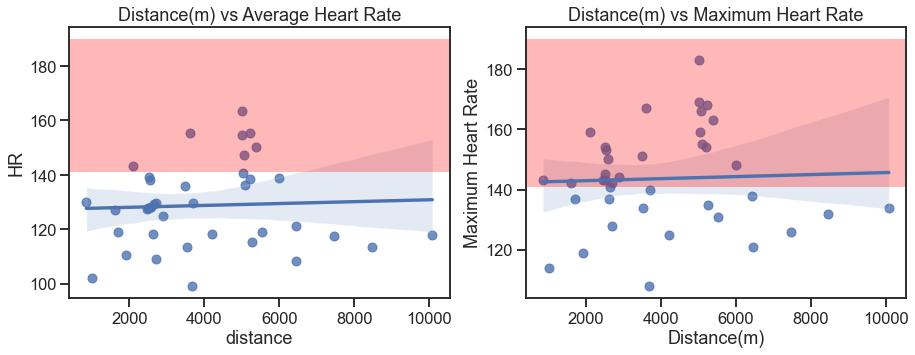

In [553]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))


sns.set(style="ticks", context="talk")
t = sns.regplot(ax=axes[0], x="distance", y="HR", data=run_df).set(title='Distance(m) vs Average Heart Rate')
plt.xlabel('Distance(m)')
plt.ylabel('Average Heart Rate')

sns.set(style="ticks", context="talk")
t = sns.regplot(ax=axes[1], x="distance", y="max_HR", data=run_df).set(title='Distance(m) vs Maximum Heart Rate')
plt.xlabel('Distance(m)')
plt.ylabel('Maximum Heart Rate')

for ax in axes:
#ax.fill_between(0,120, color="red", alpha=0.3)
    ax.axhspan(141, 190, color='red', alpha=0.15, lw=0)
    ax.axhspan(141, 190, color='red', alpha=0.15, lw=0)

*Reccomendation of run trainings to our client as follows:* 

(1) As our client performs somewhat better on Saturdays in terms of distance and speed, assuming that improving his running speed is our client's aim, he should consider having his run trainings on Saturdays. <br>

(2) If our client's aim is to train his fast twitching muscles, he should continue to do sprint workouts on Wednesdays as his top speed is usually acheived on Wednesdays. 

(3) During a couple of his workouts, his average heart rate is above the recommended range. Even though it is good to push yourself to your limit during workouts, it is important to ensure your heart is not overworking as it may lead to heart diseases and heart attack. Client should pay attention to his heart rate during strenuous activities. 

(4) Based on the number of data points within 3 months period, 39 in total, that average out to be 3 to 4 run workouts a week. 
All else equal with no medical condition disclosed, Client is considered fit and it is unusual for a person who has an active lifestyle to have such high heart rate during his run workouts. 

Although an increased heart rate is one aim of exercise, pushing the heart too far can be harmful.

Signs that a person is pushing their heart too far include chest tightness, difficulty breathing, and a relative inability to talk while running.

If Chris notices any of the above signs, he should slow down and concentrate on breathing steadily.

He should monitor and come back six months later for another round of assessment and review. 



## 2b. Cycle Workouts ##

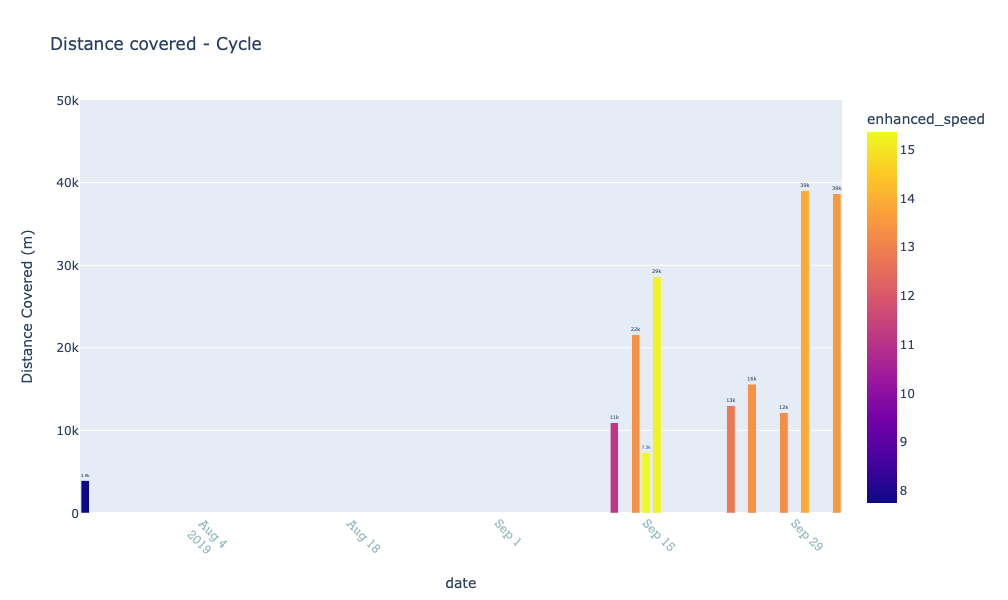

In [420]:
fig = px.bar(cycle_df,
            y = 'distance',
            x = 'date',  
            labels = {
                "distance": "Distance Covered (m)"
            },  
            title = 'Distance covered - Cycle', 
            color = 'enhanced_speed',
            text_auto='.2s', 
            height = 600, 
            width = 1000,
            ## color_discrete_Sequence changes the line color
            color_discrete_sequence=["#244747"]              
            )

fig.update_yaxes(range=[0.0, 50000.0])

## To change font type, size, color of axis 
fig.update_xaxes(tickangle=45, tickfont=dict(
                               family='Rockwell', 
                               color='#91b8bd', 
                               size=12)) 

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

fig.show()

Doing some quick charts using seaborn:

Text(0.5, 1.0, 'Average Speed vs Distance - Cycle')

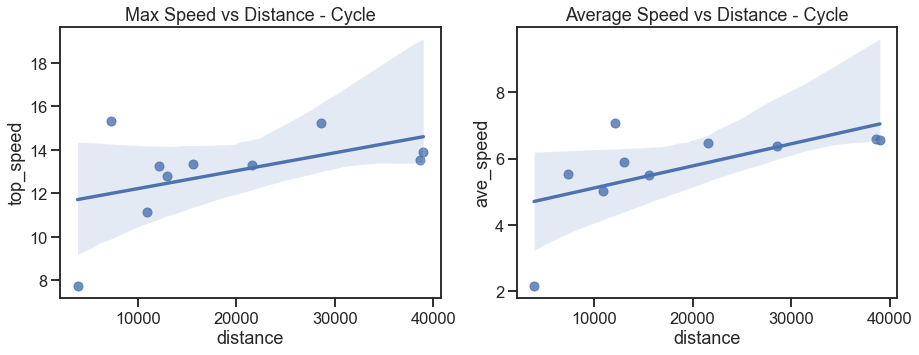

In [483]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.set(style="ticks", context="talk")
sns.regplot(ax=axes[0], x='distance', y = 'top_speed', data = cycle_df).set_title("Max Speed vs Distance - Cycle")

sns.set(style="ticks", context="talk")
sns.regplot(ax=axes[1],x='distance', y = 'ave_speed', data = cycle_df).set_title("Average Speed vs Distance - Cycle")


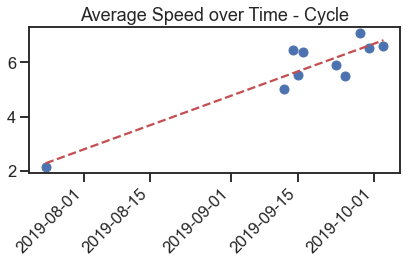

In [484]:
fig = plt.figure() #create overall container
ax1 = fig.add_subplot(111) #add a 1 by 1 plot to the figure
x1 = np.asarray(cycle_df.date)  #convert data to numpy array
y1 = np.asarray(cycle_df.ave_speed)
ax1.plot_date(x1, y1) #plot data points in scatter plot on ax1
ax1.set_title('Average Speed over Time - Cycle')
#ax1.set_ylim([0,5])
#add trend line
x3 = mdates.date2num(x1)
z=np.polyfit(x3,y1,1)
p=np.poly1d(z)
plt.plot(x1,p(x3),'r--')
#format the figure and display

fig.autofmt_xdate(rotation=45)
fig.tight_layout()

It looks like our client's cycle remained somewhat consistent at around 6.5 m /s during the period under review.

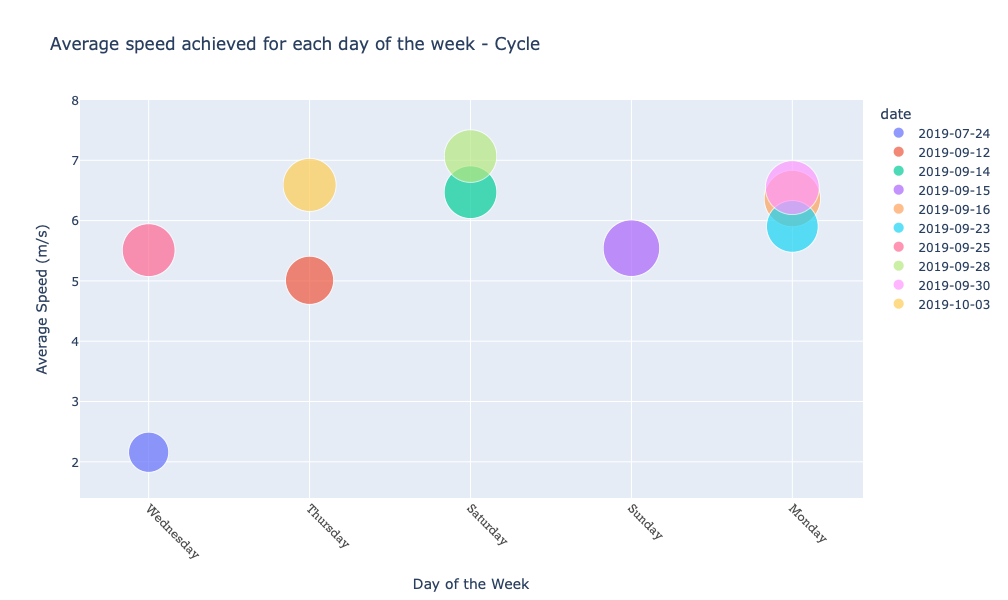

In [432]:
def px_bar_chart_top_cycle():

    fig = px.scatter(cycle_df,
            y = 'ave_speed',
            x = 'day_of_week', 
            labels = {
                "ave_speed": "Average Speed (m/s)",
                "day_of_week": "Day of the Week"
                            },
             
            title = 'Average speed achieved for each day of the week - Cycle', 
            color = 'date', 
            size = 'top_speed', size_max = 40,         
            height = 600, 
            width = 1000,
            ## color_discrete_Sequence changes the line color  
            ##color_discrete_sequence=["#acc8d4"]            
            )

    ## To change range of the y axis, I wanted to magnify the effect, so I started off the y-axis with 4.0 as compared to 0.0
    fig.update_yaxes(range=[1.4, 8.0])

    fig.update_xaxes(tickangle=45, tickfont=dict(
                               family='Rockwell', 
                               color='#4a4a4a', 
                               size=12))

    ## To include text in the bars itself
    ## fig.update_traces(textfont_size=12, textangle=0, textposition="inside", cliponaxis=False)

    fig.show()
    
    return

px_bar_chart_top_cycle()

From the above chart we can decode that Client likes to cycle on Mondays. 

Both the highest frequency and highest average speed were all clocked on Monday.

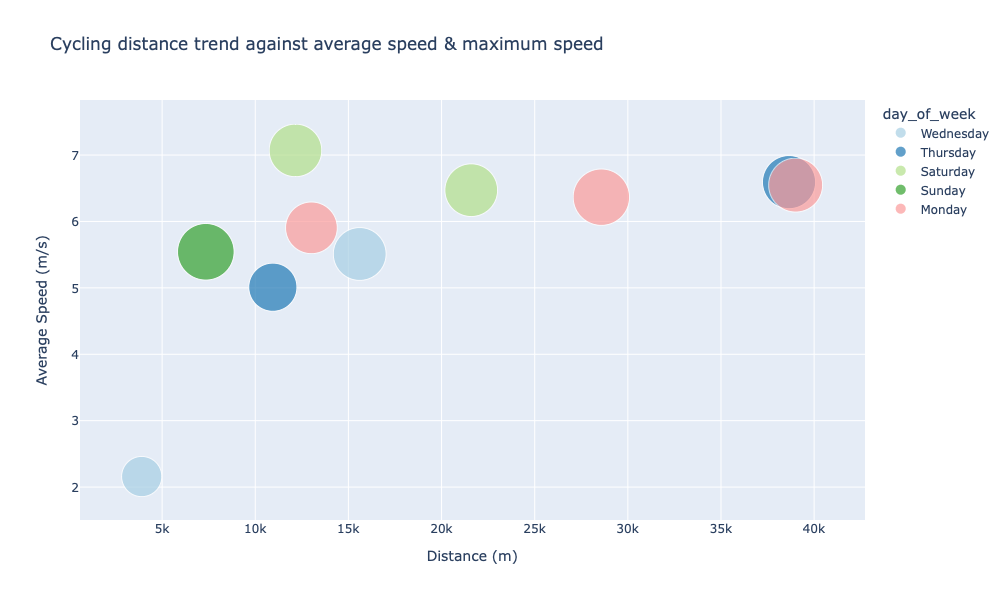

In [ ]:
def scatter_plot_():

    fig = px.scatter(cycle_df, x='distance', 
                    y = 'ave_speed',
                    labels = {
                        "ave_speed": "Average Speed (m/s)",
                        "distance": "Distance (m)"
                
                    }, 
                   color = 'day_of_week',
                   size = 'top_speed', size_max = 40,
                   title = 'Cycling distance trend against average speed & maximum speed', 
                   color_discrete_sequence = px.colors.colorbrewer.Paired, 
                   hover_name = 'day_of_week'
                   
                    )
    
    fig.update_layout(hoverlabel_bgcolor='#efe8d1',               #Change the background color of the tooltip to light blue
             autosize=False,
             width=1000,
             height=600)
    
    
    fig.show()
    
    return

scatter_plot_()

The furthest distance travelled by Client was on Monday and Thursday. It seems that he likes to clock his long distance cycling training on Mondays as two out three of his longest distance cycled were completed on Monday. 

It can be decoded from the above chart that his highest average speed was clocked on a Saturday. This finding is consistent with his run workouts whereby his fastest average speed were all clocked on Saturdays. 

From the chart, it can be decoded that his highest cycling speed was clocked on Sunday with top speed of 15.3 m/s. 


Again I will like to find out how his heart is faring during these cycling workouts. 

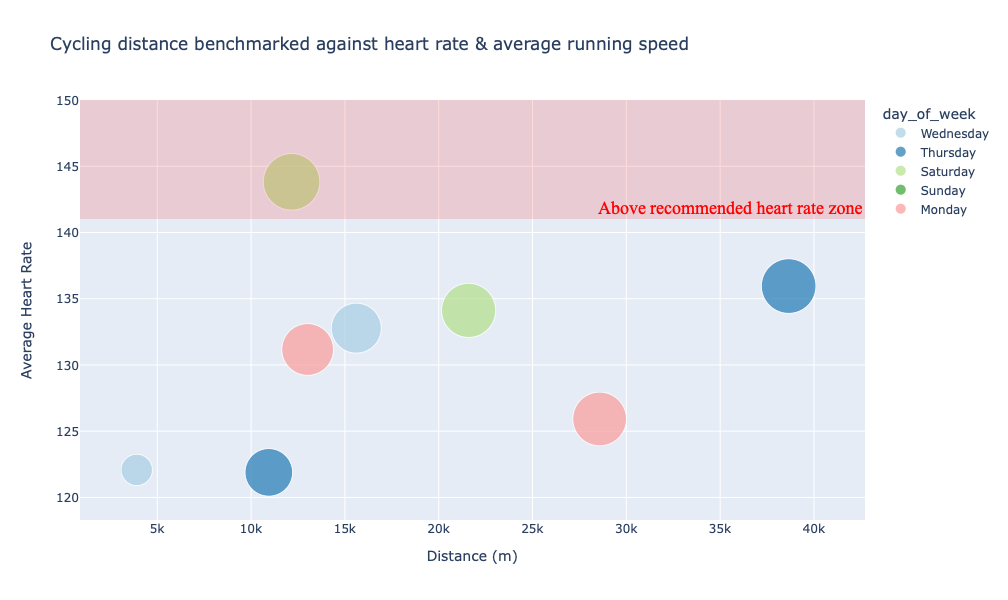

In [477]:
def scatter_plot_cycle():

    fig = px.scatter(cycle_df, x='distance', 
                    y = 'HR',
                    labels = {
                        "HR": "Average Heart Rate",
                        "distance": "Distance (m)"
                
                    }, 
                   color = 'day_of_week',
                   size = 'ave_speed', size_max = 40,
                   title = 'Cycling distance benchmarked against heart rate & average running speed', 
                   color_discrete_sequence = px.colors.colorbrewer.Paired, 
                   hover_name = 'day_of_week'
                   
                    )
    
    fig.add_hrect(y0=141, y1=150, line_width=0, fillcolor="red", opacity=0.14, 
                  annotation_text="Above recommended heart rate zone", 
                  annotation=dict(font_size=18, font_family="Times New Roman"),
                  annotation_font_color="red",
                  annotation_position="bottom right",
                 
                 )
    
    fig.update_layout(hoverlabel_bgcolor='#efe8d1',               #Change the background color of the tooltip to light blue
             autosize=False,
             width=1000,
             height=600)
    
    
    fig.show()
    
    return

scatter_plot_cycle()

From the above chart, we can decode that out of 10 cycling trips, only his Saturday ride had his heart pounding at 143 bpm, slightly above his comfortable range. This is one off out of his 10 cycling trips. He may be getting out of his comfort zone by joining a peleton ride or he was being chased after by a wild dog!

From the above chart we can decode that Client puts in more effort during his Saturday's ride. Depicting this with the earlier 
'Cycling distance trend against average speed & maximum speed and heart rate' chart, it seems that Saturday is the day he clocks his fastest ride together and his average heart rate is at its highest.


Based on the above chart and analysis, Client is cycling slightly above his target max heart rate of 141 BPM. He probably was cycling was cycling with his friends who were pushing him to go faster or he might be cycling with a paleton or chased by a dog resulting in the higher than normal heart rate. 

Lets complement this analysis with some seaborn charts as follows:


Text(0, 0.5, 'Maximum Heart Rate')

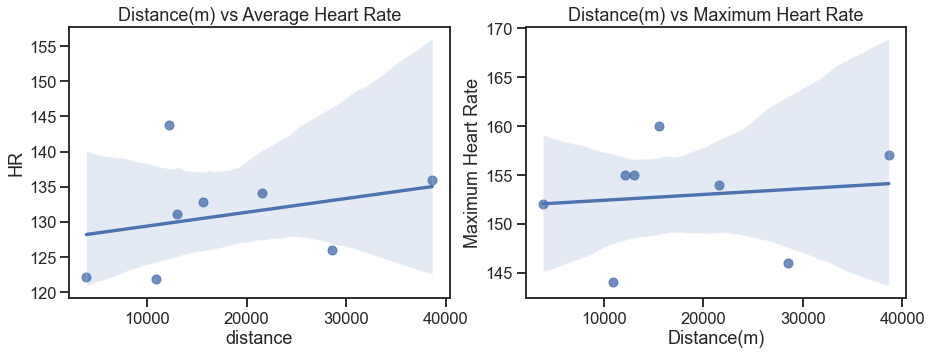

In [559]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))


sns.set(style="ticks", context="talk")
t = sns.regplot(ax=axes[0], x="distance", y="HR", data=cycle_df).set(title='Distance(m) vs Average Heart Rate')
plt.xlabel('Distance(m)')
plt.ylabel('Average Heart Rate')

sns.set(style="ticks", context="talk")
t = sns.regplot(ax=axes[1], x="distance", y="max_HR", data=cycle_df).set(title='Distance(m) vs Maximum Heart Rate')
plt.xlabel('Distance(m)')
plt.ylabel('Maximum Heart Rate')
    

It seems that client is pushing himself beyond the comfortable heart rate range.

Vigorous exercise which he was performing can make him a better athlete. But, it can also raise the risks of heart attack and injury.

Recommendation for client is to train more often, build up more endurance in order for his heart range to be kept in a comfortable range.  

## 3. Power Cadence, Heart rate Analysis

**Load just power data**<br>

Here we only include the ones with a power field and combine them all together into one giant data frame <br>


In [485]:
clean_power_df = uncleanfit_df['Power'].notna()

power_df = uncleanfit_df[clean_power_df]
power_df['time'] = power_df['distance']/power_df['enhanced_speed']
power_df['time'] = power_df['time'] / 60

power_df.describe()
#power_df.to_csv('power.csv')

,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,cadence,distance,...,fractional_cadence,heart_rate,position_lat,position_long,speed,unknown_87,unknown_88,unknown_90,distance_km,time
count,17842.000000,17847.000000,17842.000000,17847.000000,17842.000000,17847.000000,17847.000000,0.0,17847.000000,17847.000000,...,17847.0,17847.000000,1.781600e+04,1.781600e+04,0.0,17847.0,17847.000000,13521.000000,17847.000000,1.784300e+04
mean,1.872100,77.726565,99.485932,325.934107,13.138571,301.459797,6.458074,NaN,77.753852,2378.922603,...,0.0,146.439682,5.045454e+08,-9.998434e+08,NaN,0.0,299.170729,-1.144812,2.378923,inf
std,2.777476,9.202077,13.866222,71.773687,2.039567,48.540552,1.135497,NaN,9.117085,1519.322862,...,0.0,14.223825,7.907158e+04,1.975164e+06,NaN,0.0,12.852073,2.993341,1.519323,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.0,70.000000,5.043676e+08,-1.005696e+09,NaN,0.0,100.000000,-11.000000,0.000000,0.000000e+00
25%,1.000000,78.000000,97.000000,308.000000,13.000000,283.000000,6.125000,NaN,78.000000,1093.910000,...,0.0,138.000000,5.044784e+08,-9.994046e+08,NaN,0.0,300.000000,-3.000000,1.093910,7.261789e+00
50%,1.000000,79.000000,101.000000,326.000000,13.375000,303.000000,6.500000,NaN,79.000000,2190.200000,...,0.0,147.000000,5.045618e+08,-9.993498e+08,NaN,0.0,300.000000,-1.000000,2.190200,1.486485e+01
75%,2.000000,80.000000,105.000000,340.000000,13.750000,326.000000,7.000000,NaN,80.000000,3658.525000,...,0.0,158.000000,5.046168e+08,-9.990445e+08,NaN,0.0,300.000000,1.000000,3.658525,2.428277e+01
max,48.000000,88.000000,125.000000,1732.000000,16.875000,462.000000,12.500000,NaN,88.000000,6003.430000,...,0.0,183.000000,5.046772e+08,-9.985188e+08,NaN,0.0,300.000000,6.000000,6.003430,inf


In [487]:
print ("Number of datapoints :", len(power_df['Power']))

Number of datapoints : 17847


A quick plot to understand the data

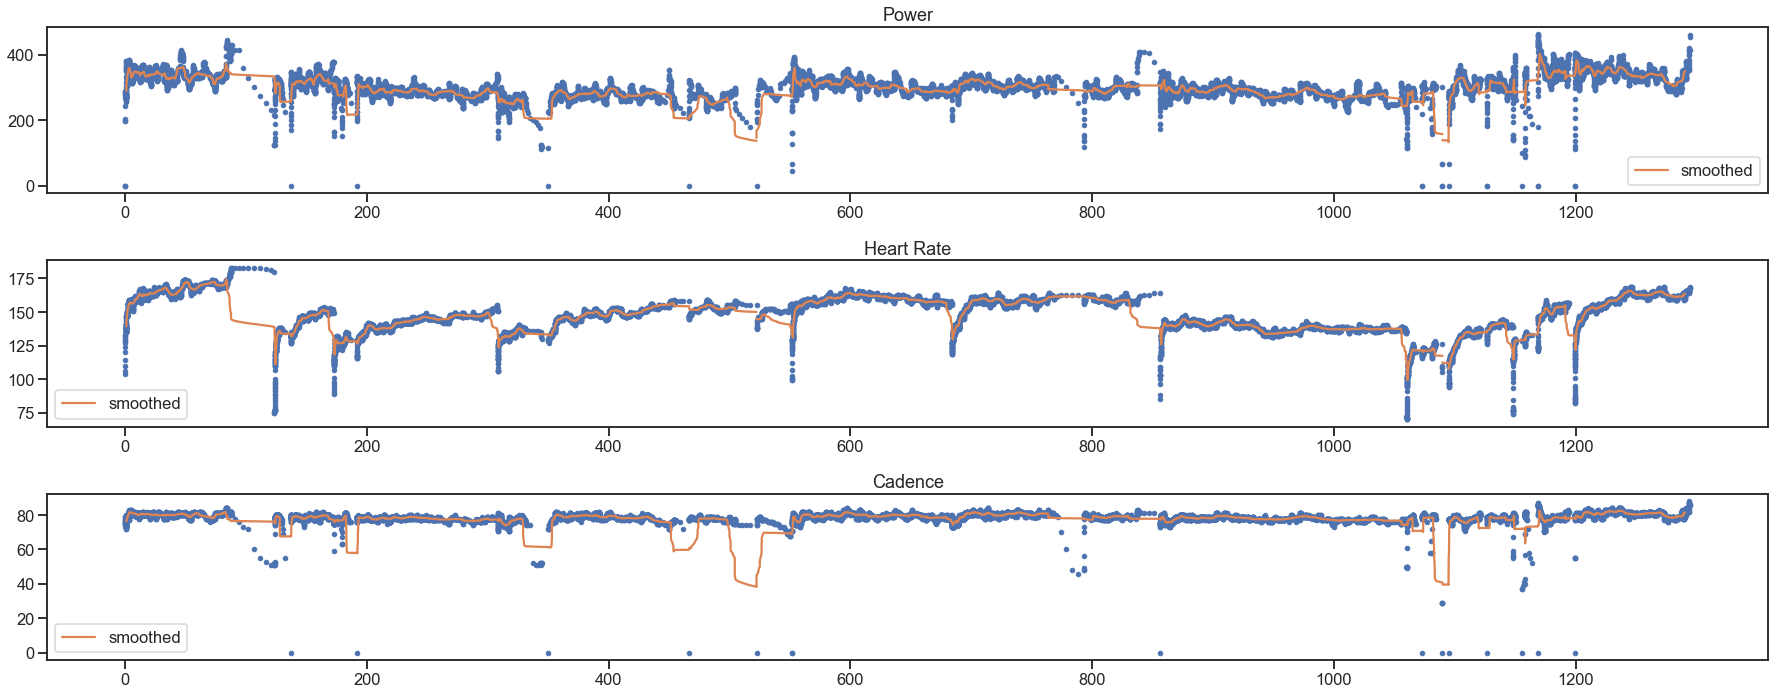

In [488]:
power_df['time'] = np.cumsum(np.clip(power_df['time'].diff(), 0, 5)) # no more than a 5 second gap between metrics

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(25, 10))


ax1.plot(power_df['time'], power_df['Power'], '.')
ax1.plot(power_df['time'], power_df['Power'].rolling(100, center=True).mean(), '-', label='smoothed')
ax1.legend()
ax1.set_title('Power')

ax2.plot(power_df['time'], power_df['heart_rate'], '.')
ax2.plot(power_df['time'], power_df['heart_rate'].rolling(100, center=True).mean(), '-', label='smoothed')
ax2.legend()
ax2.set_title('Heart Rate')

ax3.plot(power_df['time'], power_df['cadence'], '.')
ax3.plot(power_df['time'], power_df['cadence'].rolling(100, center=True).mean(), '-', label='smoothed')
ax3.legend()
ax3.set_title('Cadence')

fig.tight_layout()

<AxesSubplot:xlabel='Power', ylabel='heart_rate'>

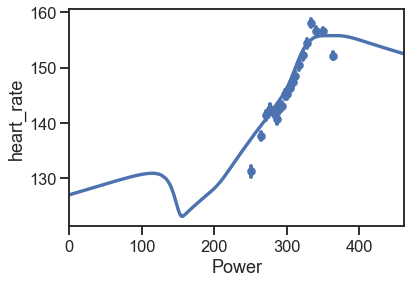

In [37]:
sns.regplot(x='Power', y='heart_rate', data=power_df, x_bins=20, lowess=True, truncate=False)

From the above chart we can decode that the mean power produced was 300 with our client's heart rate averaging at 150. 

<AxesSubplot:xlabel='cadence'>

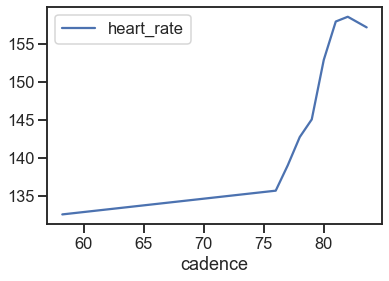

In [38]:
power_df.groupby(pd.qcut(power_df['cadence'], 20, duplicates='drop')).agg({'cadence': 'mean', 'heart_rate': 'mean'}).plot('cadence', 'heart_rate')

The above chart tells the Client that when he moves from cadence of 75 to 80, significant spike was noted for his heart rate from 135 to 155. 

<AxesSubplot:xlabel='cadence', ylabel='Power'>

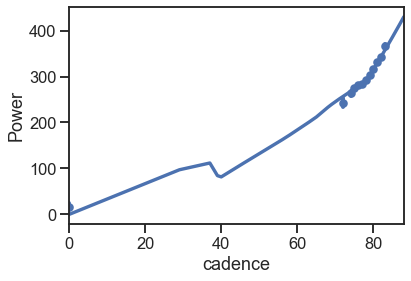

In [39]:
sns.regplot(x='cadence', y='Power', data=power_df, x_bins=100, lowess=True, label=True, truncate=False)

<AxesSubplot:xlabel='cadence'>

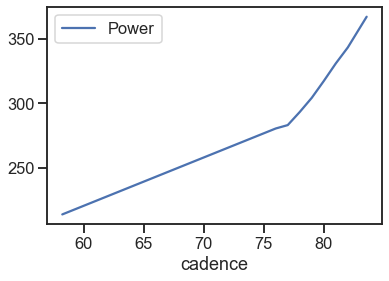

In [40]:
power_df.groupby(pd.qcut(power_df['cadence'], 20, duplicates='drop')).agg({'cadence': 'mean', 'Power': 'mean'}).plot('cadence', 'Power')

From this chart, we can depict that the gradient becomes steeper after cadence of 75. This means Client produces more power after cadence of 75. 

The next few charts as follows shows the correlation between heart rate and power 

Text(0, 0.5, 'heart rate')

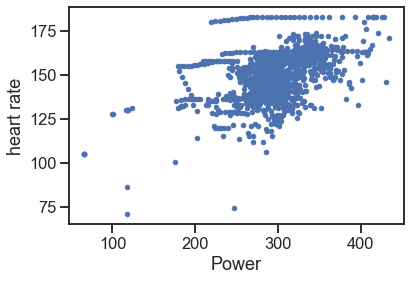

In [500]:
from scipy.interpolate import interp1d
power_vec = power_df[['time', 'Power', 'heart_rate']].query('Power>0').dropna().values
lin_time = np.arange(power_vec[:, 0].min(), power_vec[:, 0].max(), 1)
power_curve = interp1d(power_vec[:, 0], power_vec[:, 1])(lin_time)
hr_curve = interp1d(power_vec[:, 0], power_vec[:, 2])(lin_time)

power_vec[:, 0].min(), power_vec[:, 0].max()

plt.plot(power_curve, hr_curve, '.')
plt.xlabel('Power')
plt.ylabel('heart rate')

From the above chart, we can depict that at heart beat range between 125 and 175, Client has generated power between 300 to 400. 


<AxesSubplot:xlabel='t'>

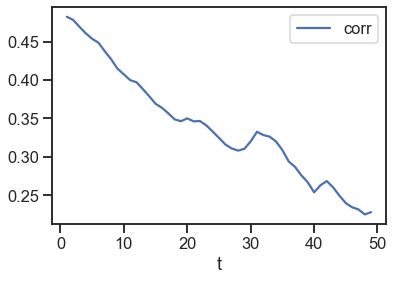

In [498]:
corr_df = pd.DataFrame([{'t': i, 
               'corr': np.corrcoef(power_curve[:-i], 
                                   hr_curve[i:])[0, 1]}
 for i in range(1, 50)])
corr_df.plot('t', 'corr')   

HR lags power by 1 seconds


Text(0, 0.5, 'HR')

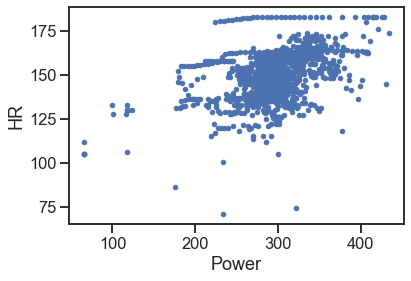

In [499]:
t_offset = corr_df['t'].values[np.argmax(corr_df['corr'].values)]
print('HR lags power by {} seconds'.format(t_offset))
plt.plot(power_curve[:-t_offset],
         hr_curve[t_offset:], 
         '.'
        )
plt.xlabel('Power')
plt.ylabel('HR')

The above chart is a measure of Client's body response to input resulting in the power (output), what the effort is amounting to in the real world.  

I am happy to tell Client that he is healthy, his heart rate lags power by only 1 second. 

---
**Author**: Steven Ong
Source code for this tutorial can be found in [Github]
---